# Advanced Machine Learning Project: fruit detection
# Part 0: Dataset Exploration

In this part, we will explore our dataset.

In [ ]:
#Librerie utili

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import tensorflow as tf

from keras import Input, Model, Sequential
from keras import optimizers, losses, metrics
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy


%matplotlib inline

## Import data in virtual machine

Data are being imported from Google Drive, in which we have a zip file that we have downloaded from Kaggle ([here](https://www.kaggle.com/moltean/fruits)).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time
# extract dataset.
!unzip drive/MyDrive/AML-Project/Dataset/fruit-360.zip

In [ ]:
path = 'fruits-360/'
train = 'fruits-360/Training/'
test = 'fruits-360/Test/'

## Import data in code

Data are being imported using an *iterator*. 

In [ ]:
H = 100
W = 100
C = "rgb"

train_processing = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                   validation_split=0
                                                                   )

train_processing_augmented = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                             rotation_range=45,
                                                                             width_shift_range=0.15,
                                                                             height_shift_range=0.15,
                                                                             zoom_range = [0.9, 1.5],
                                                                             horizontal_flip=True,
                                                                             vertical_flip=True,
                                                                             brightness_range = [0.75, 1.25],
                                                                             fill_mode = "constant",
                                                                             cval = 255.0,
                                                                             )

train_generator = train_processing.flow_from_directory(
        directory = train,
        color_mode = C,         
        batch_size = 128,
        target_size = (H, W),  
        class_mode="categorical",
        shuffle=True,
        seed=1
        )

train_generator_augmented = train_processing_augmented.flow_from_directory(
        directory = train,
        color_mode = C,         
        batch_size = 128,
        target_size = (H, W),  
        class_mode = "categorical",
        subset = 'training',
        shuffle = True,
        seed=1
        )

test_processing = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_processing.flow_from_directory(
        directory = test,
        color_mode = C,
        batch_size = 32,
        target_size = (H, W),
        class_mode = "categorical",
        shuffle = True,
        seed = 1
        )

Found 67692 images belonging to 131 classes.
Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
print(f"Numero di istanze del training: {len(train_generator.labels)}")
print(f"Numero di istanze del test: {len(test_generator.labels)}")

Numero di istanze del training: 67692
Numero di istanze del test: 22688


In [ ]:
train_generator.image_shape

(100, 100, 3)

## Images exploration (from scratch)

Our dataset is composed by color images of 131 different types of fruits and vegetables (dimensions: 100x100 pixels). Different varieties are considered as different classes. The dataset is divided into three groups:

- A *training set*, composed by 67.692 images, with one fruit or vegetable per image;
- A *test set* (labels included), composed by 22.688 images, with one fruit or vegetable per image;
- A *multiple fruits test* (labels included), composed by XX images, with more than one fruit or vegetable per image.

Photos from training and test set have been generated as screencaps from a video, so we have different views and rotations of the same fruit, and the background has been digitally removed (we have a white background for all images). The *multiple fruits test* part are simply photos taken with a camera, with background included.


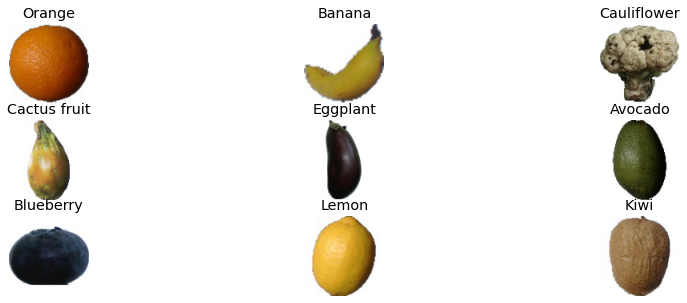

In [ ]:
lab = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Blueberry','Lemon', 'Kiwi']

fig = plt.figure(figsize =(15,5))
for i in range(len(lab)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(lab[i])
    plt.axis("off")
    ax.imshow(load_img(train + lab[i] +"/0_100.jpg", target_size=(100,100)))

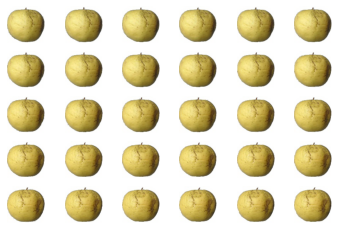

In [ ]:
fruit_type = "Apple Golden 1"
num_images = 30
width = 5
height = int(num_images/width)

fig = plt.figure()
for i in range(num_images):
    ax = fig.add_subplot(width,height,i+1,xticks=[],yticks=[])
    #plt.title(str(i))
    plt.axis("off")
    ax.imshow(load_img(train + fruit_type + "/" + str(i) + "_100.jpg", target_size=(100,100)))


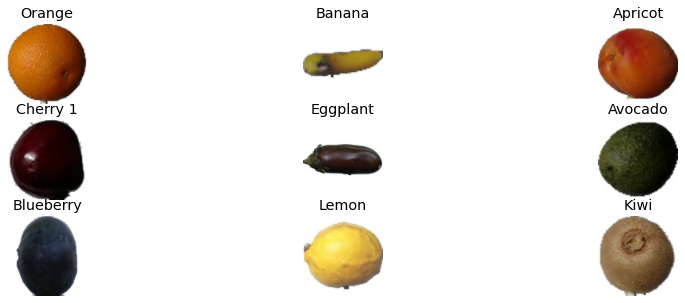

In [ ]:
lab = ['Orange', 'Banana', 'Apricot', 'Cherry 1', 'Eggplant', 'Avocado', 'Blueberry','Lemon', 'Kiwi']

fig = plt.figure(figsize =(15,5))
for i in range(len(lab)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(lab[i])
    plt.axis("off")
    ax.imshow(load_img(train + lab[i] +"/r_0_100.jpg", target_size=(100,100)))

## Augmentation operations visualization (from scratch)

We have performed augmentation operations in our dataset, so let's see how different operations will change our images.

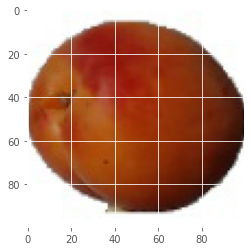

In [ ]:
# Original image

fruit_type = 'Apricot' #Change here the fruit type
img = load_img(train + fruit_type +"/r_0_100.jpg")
plt.imshow(img)

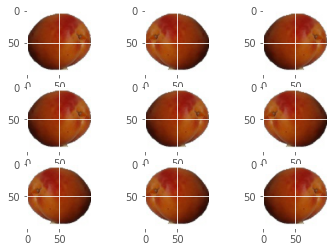

In [ ]:
# Write these options in the code to visualize
# different augmentation operations

# rotation_range=30
# width_shift_range=0.1
# height_shift_range=0.1
# zoom_range=0.2
# horizontal_flip=True
# vertical_flip=True

# Prepare image
data = np.expand_dims(img_to_array(img), 0)

# Generate iterator (for only one image)
datagen = ImageDataGenerator(horizontal_flip=True) #Change here!!
it = datagen.flow(data, batch_size=1)

# Plots
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)

plt.show()

## Images exploration (from generator)

**IMAGES BEFORE AUGMENTATION**

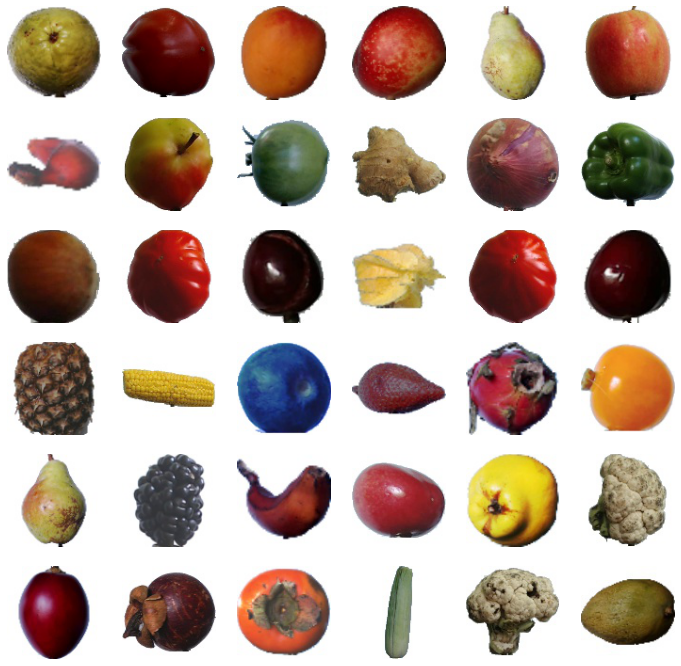

In [ ]:
fig = plt.figure(figsize =(12,12))
i = 0
for elem in train_generator[0][0]:
  ax = fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
  i = i + 1
  plt.axis("off")
  ax.imshow(elem)
  if i > 35 : break

**IMAGES AFTER AUGMENTATION**

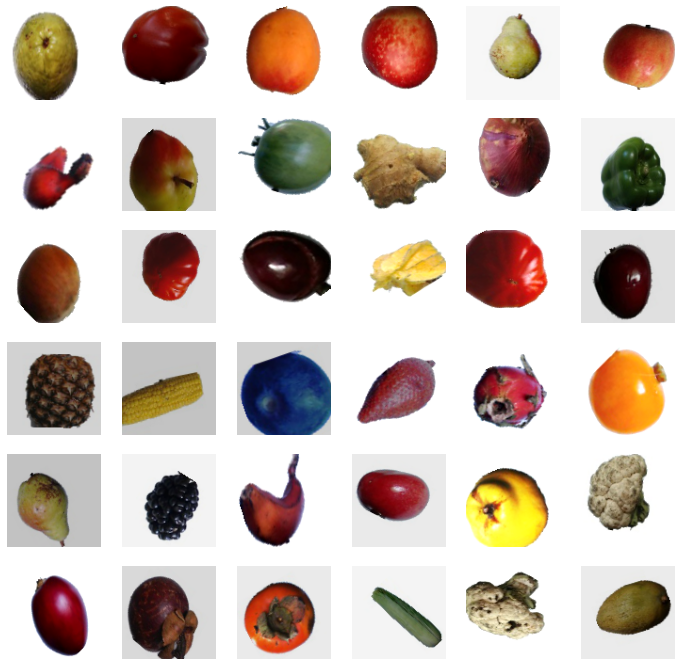

In [ ]:
fig = plt.figure(figsize =(12,12))
i = 0
for elem in train_generator_augmented[0][0]:
  ax = fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
  i = i + 1
  plt.axis("off")
  ax.imshow(elem)
  if i > 35 : break

## Labels explorations

In [ ]:
train_generator.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

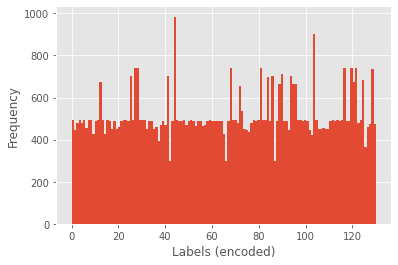

In [ ]:
# Training labels
plt.hist(train_generator.labels, bins = 131)
plt.ylabel('Frequency')
plt.xlabel('Labels (encoded)');

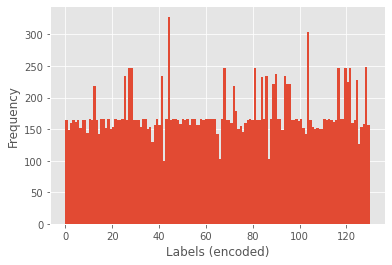

In [ ]:
# Test labels
plt.hist(test_generator.labels, len(np.unique(train_generator.labels)))
plt.ylabel('Frequency')
plt.xlabel('Labels (encoded)');

In [ ]:
from collections import Counter

dict_cnt = Counter(train_generator.labels)
dict_cnt

Counter({0: 492,
         1: 444,
         2: 480,
         3: 492,
         4: 481,
         5: 492,
         6: 456,
         7: 492,
         8: 492,
         9: 429,
         10: 490,
         11: 492,
         12: 672,
         13: 492,
         14: 427,
         15: 491,
         16: 490,
         17: 450,
         18: 490,
         19: 450,
         20: 462,
         21: 490,
         22: 492,
         23: 492,
         24: 490,
         25: 702,
         26: 492,
         27: 738,
         28: 738,
         29: 492,
         30: 492,
         31: 492,
         32: 450,
         33: 490,
         34: 490,
         35: 450,
         36: 462,
         37: 392,
         38: 468,
         39: 490,
         40: 468,
         41: 702,
         42: 297,
         43: 490,
         44: 984,
         45: 492,
         46: 490,
         47: 490,
         48: 492,
         49: 471,
         50: 490,
         51: 492,
         52: 490,
         53: 464,
         54: 490,
         55: 490,
  

In [ ]:
dict_cnt.most_common(n = 3)

# 44 -> grape blue
# 104 -> plum
# 27 -> cherry

[(44, 984), (104, 900), (27, 738)]

## **Reconstruction of generator video from images**

The reconstructed video contains some misplaced frames because some images in the dataset are not in the correct order.

In [ ]:
!pip install ffmpeg-python
import ffmpeg

In [ ]:
ffmpeg.input(train + 'Apple Golden 1/*.jpg', pattern_type='glob', framerate=25).output('movie.mp4').run()
ffmpeg.input(train + 'Apple Golden 1/*.jpg', pattern_type='glob', framerate=25).output('movie.mp4')

output(filename='movie.mp4')[None] <f760f26ce4f0>